# Input & Label

In [1]:
from rtmag.paper.load import load_input_label, MyModel

In [2]:
input_files, label_files = load_input_label("/mnt/f/isee_dataset/11158")
len(input_files), len(label_files)

(66, 66)

In [3]:
idx = 48
input_files[idx]

PosixPath('/mnt/f/isee_dataset/11158/input/input_11158_20110215_012400.npz')

In [5]:
from sunpy.map import Map
from skimage.transform import resize
import matplotlib.pyplot as plt

See https://docs.sunpy.org/en/stable/code_ref/map.html#fixing-map-metadata for how to fix metadata before loading it with sunpy.map.Map.
See https://fits.gsfc.nasa.gov/fits_standard.html for the FITS unit standards. [sunpy.map.mapbase]


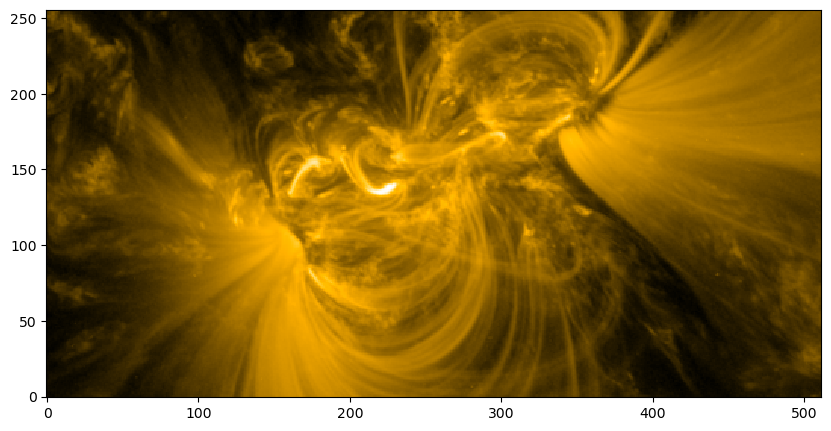

In [6]:
hmi_Br = Map("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158/hmi/hmi.sharp_cea_720s.377.20110215_012400_TAI.Br.fits")
aia_171 = Map("/home/mgjeon/space/workspace/ar_nlfff_piml/notebook_paper/download/11158/aia/171/aia.lev1_euv_12s.2011-02-15T012613Z.171.image_lev1.fits")
aia_171 = Map(aia_171)
aia_171 = aia_171.reproject_to(hmi_Br.wcs)
aia_171_data = resize(aia_171.data, (256, 512))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(aia_171_data, **aia_171.plot_settings)

# Model prediction & Label (NLFFF, Potential)

In [7]:
from time import time

In [8]:
# mm = MyModel("/home/mgjeon/space/workspace/base/pino_CC_Hnorm_Unit_2/best_model.pt")
mm = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/best_model.pt")
# mm2 = MyModel("/home/mgjeon/space/workspace/base/uno_pi_cc_hnorm_unit_aug/model_60.pt")

Model loaded from epoch 40


In [9]:
start_time = time()
b = mm.get_pred(input_files[idx])
print(f"{time() - start_time} seconds")

0.8565747737884521 seconds


In [10]:
start_time = time()
B = mm.get_label(label_files[idx])
print(f"{time() - start_time} seconds")

1.7471251487731934 seconds


In [11]:
start_time = time()
Bp = mm.get_pot(label_files[idx])
print(f"{time() - start_time} seconds")

1.6808786392211914 seconds


In [12]:
start_time = time()
dx, dy, dz, dV = mm.get_dV(input_files[idx])
print(f"{time() - start_time} seconds")

0.003406524658203125 seconds


# Qualitative Evaluation

In [13]:
import matplotlib.pyplot as plt

/tmp/ipykernel_3526524/1438892077.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


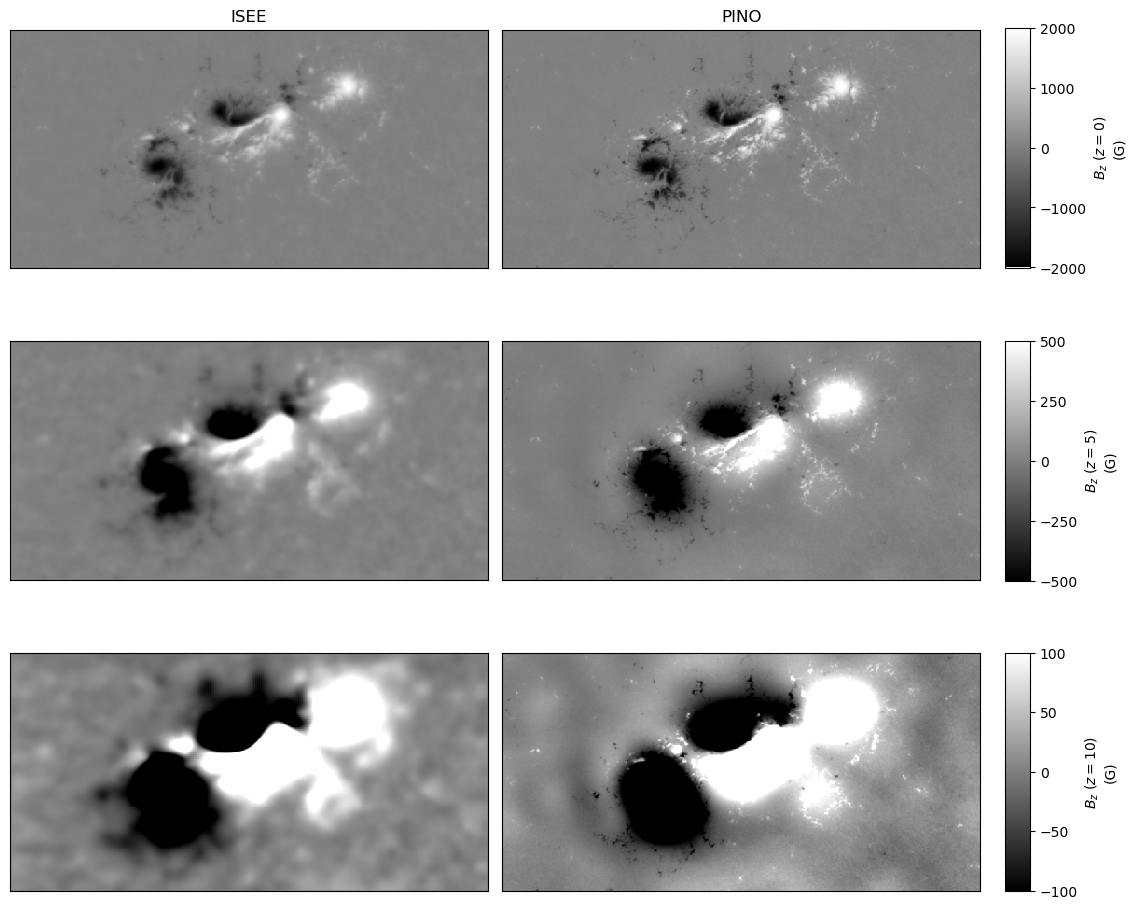

In [14]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

axs[0, 0].pcolormesh(B[:, :, 1, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, 0, 2].T, cmap="gray", vmin=-2000, vmax=2000)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=0)$\n(G)', ticks=[-2000, -1000, 0, 1000, 2000])

axs[1, 0].pcolormesh(B[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, 5, 2].T, cmap="gray", vmin=-500, vmax=500)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=5)$\n(G)', ticks=[-500, -250, 0, 250, 500])
# fig.colorbar(im)

axs[2, 0].pcolormesh(B[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, 10, 2].T, cmap="gray", vmin=-100, vmax=100)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label='$B_z$ $(z=10)$\n(G)', ticks=[-100, -50, 0, 50, 100])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

/tmp/ipykernel_3526524/759628588.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


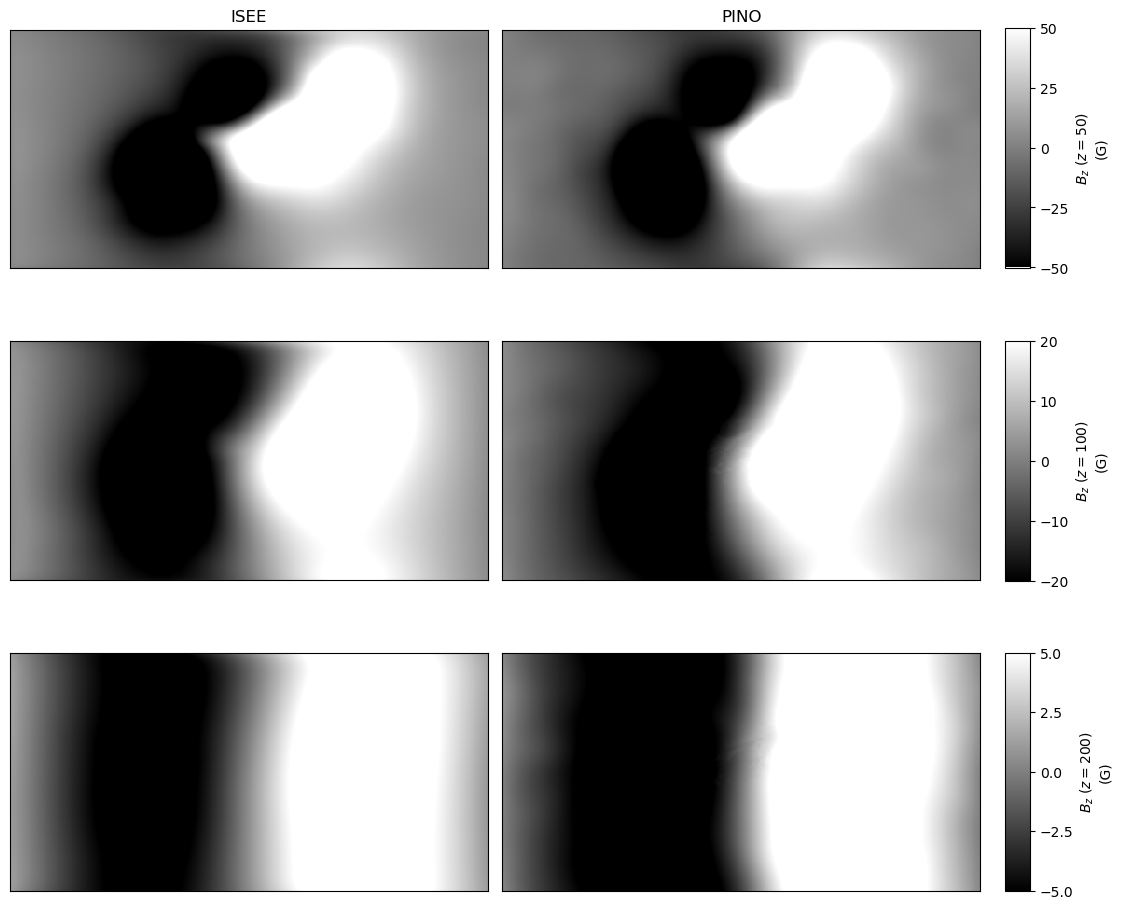

In [15]:
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

z = 50
vmm = 50
axs[0, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 0].set_title("ISEE")
axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])
axs[0, 0].set_aspect("equal")

im = axs[0, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
axs[0, 1].set_title("PINO")
axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])
axs[0, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.693, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])

z = 100
vmm = 20
axs[1, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 0].set_title("ISEE $B_z$ $(z=5)$")
axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])
axs[1, 0].set_aspect("equal")

im = axs[1, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[1, 1].set_title("PINO $B_z$ $(z=5)$")
axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])
axs[1, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.38, 0.025, 0.24])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)

z = 200
vmm = 5
axs[2, 0].pcolormesh(B[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 0].set_title("ISEE $B_z$ $(z=10)$")
axs[2, 0].set_xticks([])
axs[2, 0].set_yticks([])
axs[2, 0].set_aspect("equal")

im = axs[2, 1].pcolormesh(b[:, :, z, 2].T, cmap="gray", vmin=-vmm, vmax=vmm)
# axs[2, 1].set_title("PINO $B_z$ $(z=10)$")
axs[2, 1].set_xticks([])
axs[2, 1].set_yticks([])
axs[2, 1].set_aspect("equal")
cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
fig.colorbar(im, cax=cax, label=f'$B_z$ $(z={z})$\n(G)', ticks=[-vmm, -vmm/2, 0, vmm/2, vmm])
# fig.colorbar(im)


plt.tight_layout()
plt.show()

In [16]:
from rtmag.paper.metric import vector_norm, current_density
import numpy as np

In [17]:
start_time = time()
j = current_density(b, dx, dy, dz)  # [mA/m^2]
j_map = vector_norm(j).sum(2) 
j_map *= 1e-7 # A/cm^2
j_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.9893133640289307 seconds


In [18]:
start_time = time()
J = current_density(B, dx, dy, dz)
J_map = vector_norm(J).sum(2) # A/m^2
J_map *= 1e-7 # A/cm^2
J_map *= dz # A/cm
print(f"{time() - start_time} seconds")

0.5227282047271729 seconds


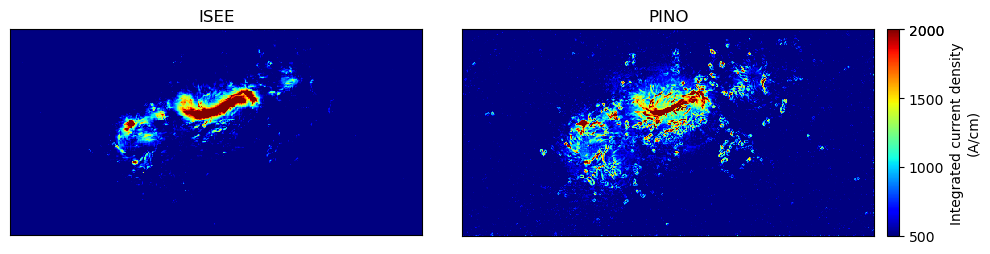

In [19]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 500
vmax = 2000

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(J_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(j_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated current density\n(A/cm)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [20]:
e_den = (vector_norm(b)**2)/(8*np.pi)   # erg/cm^3
E_den = (vector_norm(B)**2)/(8*np.pi)

e_map = e_den.sum(2) * dz   # erg/cm^2
E_map = E_den.sum(2) * dz

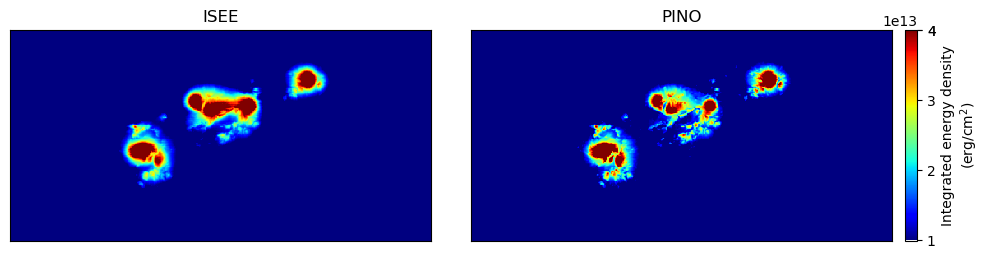

In [21]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

vmin = 1e13
vmax = 4e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated energy density\n(erg/cm$^2$)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [22]:
Ep_den = (vector_norm(Bp)**2)/(8*np.pi)
Ep_map = Ep_den.sum(2) * dz

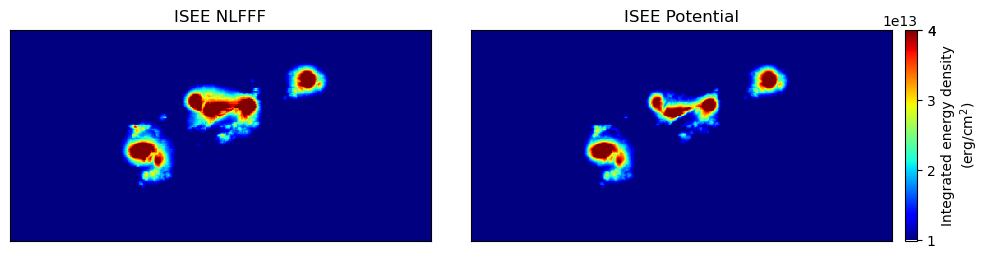

In [23]:
vmin = 1e13
vmax = 4e13

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE NLFFF")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(Ep_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("ISEE Potential")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)

fig.colorbar(im, cax = cax, label='Integrated energy density\n(erg/cm$^2$)', ticks=[vmin, 2*vmin, 3*vmin, 4*vmin, vmax])

plt.tight_layout()
plt.show()

In [24]:
E_free_map = E_map - Ep_map
e_free_map = e_map - Ep_map

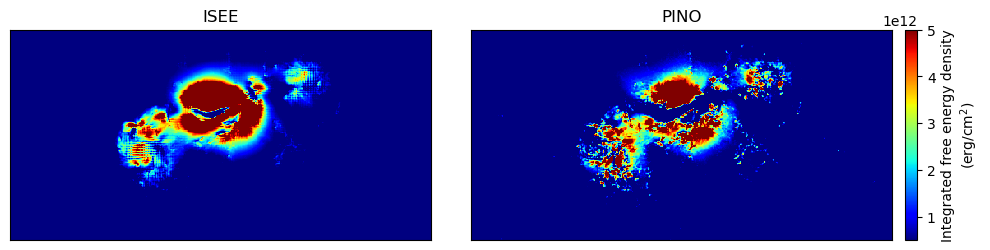

In [25]:
vmin = 5e11
vmax = 5e12

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
im = axs[0].pcolormesh(E_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[0].set_title("ISEE")
axs[0].set_aspect("equal")
axs[0].set_xticks([])
axs[0].set_yticks([])
divider = make_axes_locatable(axs[0])
cax = divider.append_axes("right", size="3%", pad="3%")
cax.set_xticks([])
cax.set_yticks([])
cax.axis("off")


# cax = fig.add_axes([1.01, 0.07, 0.025, 0.238])
# fig.colorbar(im, cax=cax, label='$J$\n(A/m$^2$)', ticks=[0, 0.5, 1, 10, 2], orientation="horizontal", location="bottom")

axs[1].pcolormesh(e_free_map.T, cmap="jet", vmin=vmin, vmax=vmax)
axs[1].set_title("PINO")
axs[1].set_aspect("equal")
axs[1].set_xticks([])
axs[1].set_yticks([])

divider = make_axes_locatable(axs[1])
cax = divider.append_axes("right", size="3%", pad="3%")
fig.add_axes(cax)
fig.colorbar(im, cax = cax, label='Integrated free energy density\n(erg/cm$^2$)')

plt.tight_layout()
plt.show()

In [26]:
from streamtracer import StreamTracer, VectorGrid

In [42]:
nsteps = 10000
step_size = 0.1
tracer = StreamTracer(nsteps, step_size)

Lx = 512
Ly = 256
numbers = 30
# xmin, xmax, ymin, ymax
xyranges = [
    [0.30, 0.35, 0.40, 0.50],
    [0.55, 0.60, 0.60, 0.70],
    [0.70, 0.75, 0.70, 0.80],
]
grid_spacing = [1, 1, 1]

grid = VectorGrid(b, grid_spacing)
grid_true = VectorGrid(B, grid_spacing)

seeds_xs = []
tracer_xs = []
tracer_xs_true = []

for xyrange in xyranges:

    xrange = np.array(xyrange[:2]) * Lx
    yrange = np.array(xyrange[2:]) * Ly

    np.random.seed(0)
    seeds = np.random.rand(numbers, 3) * [1, 1, 0]
    # seeds = np.stack([np.linspace(0, 1, numbers), np.linspace(0, 1, numbers), np.linspace(0, 1, numbers)], axis=-1) * [1, 1, 0]
    seeds[:, 0] = seeds[:, 0] * (xrange[1] - xrange[0]) + xrange[0]
    seeds[:, 1] = seeds[:, 1] * (yrange[1] - yrange[0]) + yrange[0]
    seeds_xs.append(seeds)

    tracer.trace(seeds, grid)
    tracer_xs.append(tracer.xs)
    tracer.trace(seeds, grid_true)
    tracer_xs_true.append(tracer.xs)


seeds_xs = np.vstack(seeds_xs)
tracer_xs = [item for sublist in tracer_xs for item in sublist]
tracer_xs_true = [item for sublist in tracer_xs_true for item in sublist]

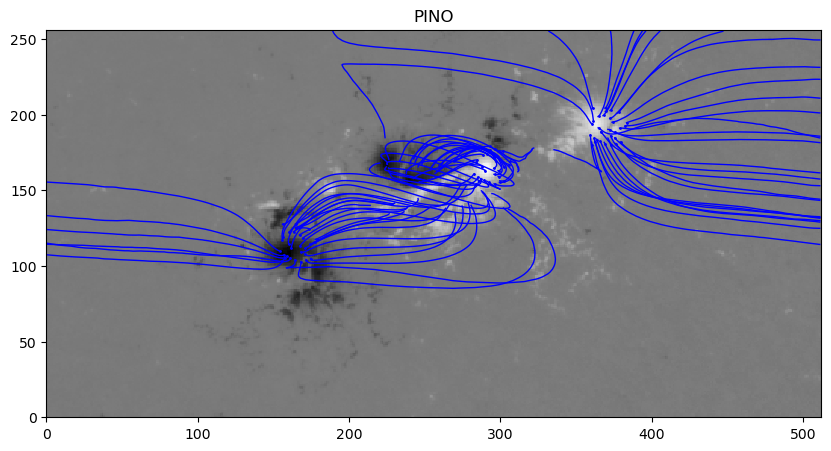

In [43]:
seedcolor = 'blue'
seedsize = 1
linecolor = 'blue'
linesize = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pcolor(b[..., 0, 2].T, cmap='gray')
ax.set_aspect('equal')
ax.plot(seeds_xs[:, 0], seeds_xs[:, 1], 'o', color=seedcolor, markersize=seedsize)
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=linecolor, linewidth=linesize)
plt.title("PINO")
plt.show()

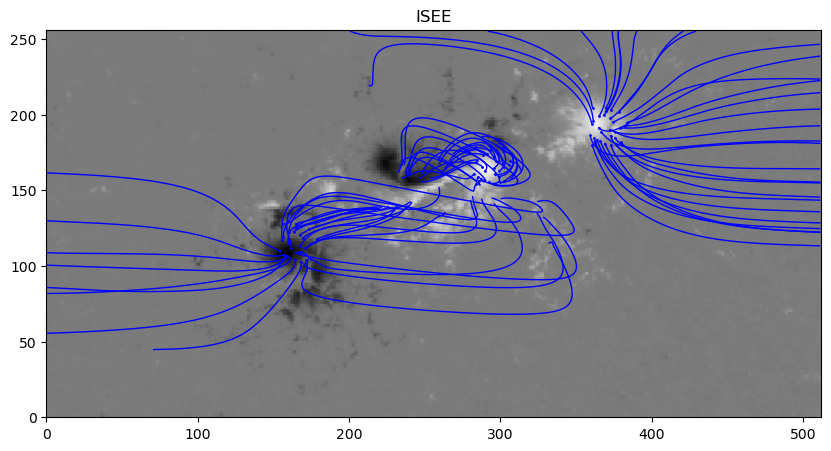

In [44]:
seedcolor = 'blue'
seedsize = 1
linecolor = 'blue'
linesize = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.pcolor(B[..., 0, 2].T, cmap='gray')
ax.set_aspect('equal')
ax.plot(seeds_xs[:, 0], seeds_xs[:, 1], 'o', color=seedcolor, markersize=seedsize)
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=linecolor, linewidth=linesize)
plt.title("ISEE")
plt.show()

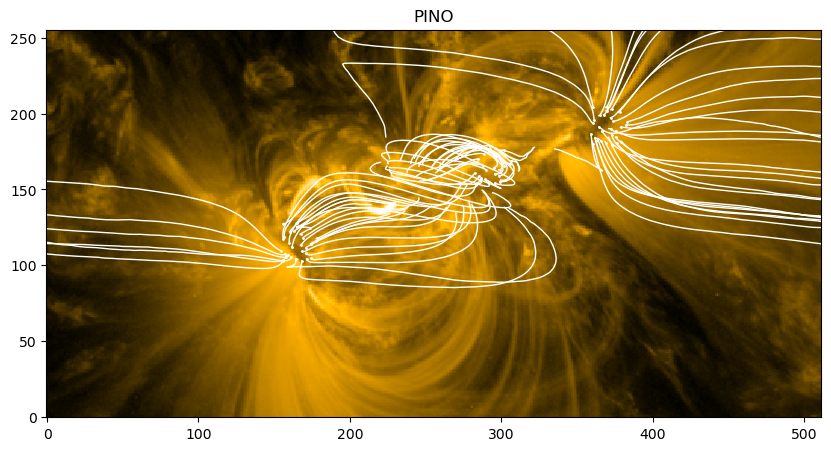

In [45]:
seedcolor = 'white'
seedsize = 1
linecolor = 'white'
linesize = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(aia_171_data, **aia_171.plot_settings)
ax.set_aspect('equal')
ax.plot(seeds_xs[:, 0], seeds_xs[:, 1], 'o', color=seedcolor, markersize=seedsize)
for xl in tracer_xs:
    ax.plot(xl[:,0], xl[:,1], color=linecolor, linewidth=linesize)
plt.title("PINO")
plt.show()

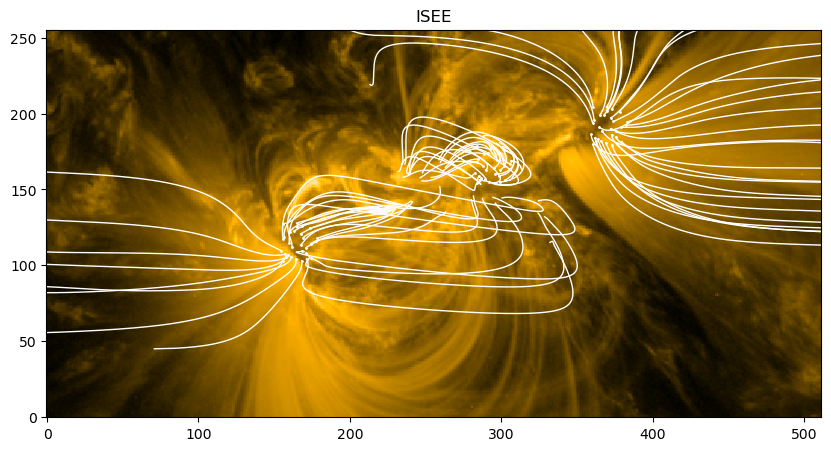

In [46]:
seedcolor = 'white'
seedsize = 1
linecolor = 'white'
linesize = 1

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
ax.imshow(aia_171_data, **aia_171.plot_settings)
ax.set_aspect('equal')
ax.plot(seeds_xs[:, 0], seeds_xs[:, 1], 'o', color=seedcolor, markersize=seedsize)
for xl in tracer_xs_true:
    ax.plot(xl[:,0], xl[:,1], color=linecolor, linewidth=linesize)
plt.title("ISEE")
plt.show()